# models comparison

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.optimize import curve_fit


# BIC and mcFadden_R2
the first way to compare models is bayesian information criterion; BICs don't have a meaning by themselves it's the delta BIC between models that decides which model in better. the model with smaller BIC explains the behavior better.
## interpretation:

about BIC difference absolute amount:
0–2: Not worth more than a bare mention
2–6: good
6–10: Strong
+10: Very strong

In [2]:
output_dir = r"14_RL_agent_TDlearn_output_model_comparison_risk_dualQ"
os.makedirs(output_dir, exist_ok=True)

file_see_colors = "11_RL_agent_TDlearn_output_risk_dualQ/models_evaluation.csv"
file_see_numbers = "12_RL_agent_TDlearn_output_risk_dualQ/models_evaluation.csv"
file_see_colors_and_numbers = "13_RL_agent_TDlearn_output_risk_dualQ/models_evaluation.csv"


df_see_colors = pd.read_csv(file_see_colors)
df_see_numbers = pd.read_csv(file_see_numbers)
df_see_colors_and_numbers = pd.read_csv(file_see_colors_and_numbers)
df_see_colors_and_numbers

,participants,best_alpha_r,best_alpha_s,best_beta,best_eta,BIC,AIC,accuracy,precision,sensitivity_recall,specificity,f1_score,mcFadden_r2,r2
0,06_06_2025_16_43_26,0.422724,0.364574,3.153623,-0.909363,294.709200,280.315512,0.640741,0.669231,0.617021,0.666667,0.642066,0.271428,-0.439881
1,07_04_2025_22_51_04,0.310707,0.454242,3.153623,-0.851788,299.331555,284.937867,0.625926,0.500000,0.584158,0.650888,0.538813,0.224237,-0.597633
2,07_11_2024_17_23_43,0.239988,0.476492,5.284594,-0.797651,268.895284,254.501597,0.714815,0.720000,0.681818,0.746377,0.700389,0.341197,-0.141304
3,08_11_2024_13_03_29,0.280827,0.993619,5.972187,-0.508693,273.554930,259.161242,0.696296,0.766423,0.677419,0.721739,0.719178,0.318148,-0.242076
4,10_06_2025_16_06_19,0.192770,0.919637,4.314101,-0.909363,306.515374,292.121686,0.611111,0.658730,0.572414,0.656000,0.612546,0.237905,-0.564138
5,11_11_2024_16_46_44,0.239988,0.956571,5.972187,-0.695925,237.118287,222.724599,0.785185,0.795276,0.759398,0.810219,0.776923,0.426239,0.140552
6,12_11_2024_00_15_17,0.280827,0.600625,6.566110,-0.909363,237.677621,223.283934,0.744444,0.736111,0.773723,0.714286,0.754448,0.424744,-0.022447
7,13_11_2024_10_46_21,0.310707,0.993619,4.314101,-0.909363,254.246709,239.853021,0.740741,0.775000,0.683824,0.798507,0.726562,0.380544,-0.037094
8,13_11_2024_14_45_52,0.422724,0.993619,2.366243,-0.909363,326.833924,312.440237,0.637037,0.642857,0.652174,0.621212,0.647482,0.186350,-0.452569
9,14_11_2024_21_46_47,0.310707,0.993619,5.972187,-0.909363,234.192711,219.799023,0.751852,0.793893,0.722222,0.785714,0.756364,0.432324,0.002976


# models evaluation metrics

Saved: 14_RL_agent_TDlearn_output_model_comparison_risk_dualQ\models_evaluation_metrics.pdf


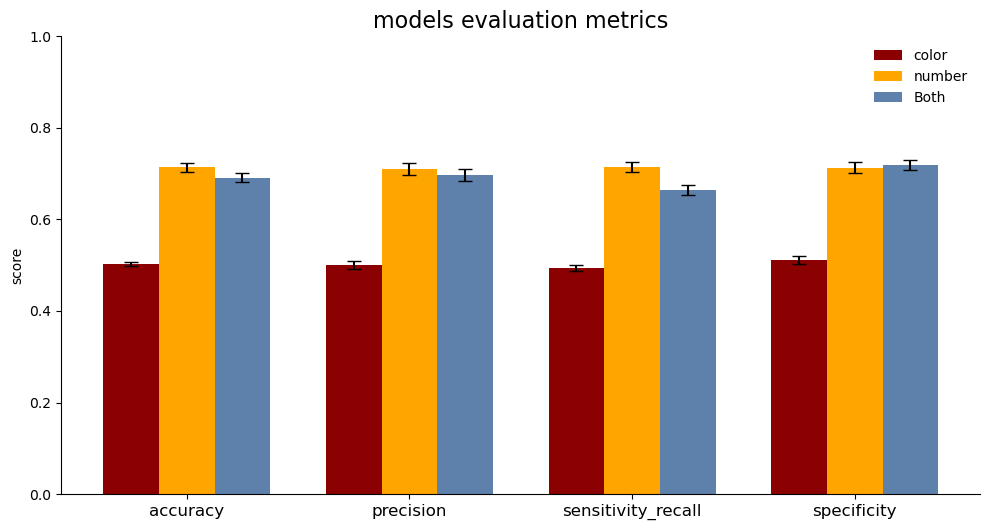

In [3]:
metrics = ['accuracy', 'precision', 'sensitivity_recall', 'specificity']
conditions = ['color', 'number', 'Both']
colors = ['#8b0000', 'orange', '#5e81ac']

# Compute means and SEMs
means = [
    df_see_colors[metrics].mean().values,
    df_see_numbers[metrics].mean().values,
    df_see_colors_and_numbers[metrics].mean().values
]

sems = [
    df_see_colors[metrics].sem().values,
    df_see_numbers[metrics].sem().values,
    df_see_colors_and_numbers[metrics].sem().values
]

means = np.array(means)
sems = np.array(sems)

# Plotting
x = np.arange(len(metrics))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
bars = []

for i in range(len(conditions)):
    bars.append(
        ax.bar(
            x + (i - 1) * width, 
            means[i], 
            width, 
            yerr=sems[i],
            capsize=5,
            label=conditions[i], 
            color=colors[i]
        )
    )

# Labels and aesthetics
ax.set_ylabel('score')
ax.set_title('models evaluation metrics', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=12)
ax.set_ylim(0, 1)
legend = ax.legend(frameon=False)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.tight_layout(rect=[0, 0, 1, 0.9]) 

filename = os.path.join(output_dir, "models_evaluation_metrics.pdf")
plt.savefig(filename, format='pdf')
print(f"Saved: {filename}")

plt.show()


# BIC and R2 calculations

In [4]:
bic_see_colors = df_see_colors["BIC"]
bic_see_numbers = df_see_numbers["BIC"]
bic_sees_colors_and_numbers = df_see_colors_and_numbers["BIC"]

aic_see_colors = df_see_colors["AIC"]
aic_see_numbers = df_see_numbers["AIC"]
aic_sees_colors_and_numbers = df_see_colors_and_numbers["AIC"]

mcFadden_r2_see_colors = df_see_colors["mcFadden_r2"]
mcFadden_r2_see_numbers = df_see_numbers["mcFadden_r2"]
mcFadden_r2_sees_colors_and_numbers = df_see_colors_and_numbers["mcFadden_r2"]

delta_bic_see_colors_see_numbers = bic_see_colors - bic_see_numbers
delta_bic_see_colors_and_numbers_see_colors = bic_see_colors - bic_sees_colors_and_numbers
delta_bic_see_colors_and_numbers_see_numbers = bic_see_numbers - bic_sees_colors_and_numbers

delta_aic_see_colors_see_numbers = aic_see_colors - aic_see_numbers
delta_aic_see_colors_and_numbers_see_colors = aic_see_colors - aic_sees_colors_and_numbers
delta_aic_see_colors_and_numbers_see_numbers = aic_see_numbers - aic_sees_colors_and_numbers

delta_mcFadden_r2_see_colors_see_numbers = mcFadden_r2_see_colors - mcFadden_r2_see_numbers
delta_mcFadden_r2_see_colors_and_numbers_see_colors = mcFadden_r2_see_colors - mcFadden_r2_sees_colors_and_numbers
delta_mcFadden_r2_see_colors_and_numbers_see_numbers = mcFadden_r2_see_numbers - mcFadden_r2_sees_colors_and_numbers



# BIC and R2 calculations visualizations

C:\Users\Nill\AppData\Local\Temp\1\ipykernel_7252\2283828842.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_bic = axs[0].boxplot(
C:\Users\Nill\AppData\Local\Temp\1\ipykernel_7252\2283828842.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_aic = axs[1].boxplot(
C:\Users\Nill\AppData\Local\Temp\1\ipykernel_7252\2283828842.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_mcFadden = axs[2].boxplot(


Saved: 14_RL_agent_TDlearn_output_model_comparison_risk_dualQ\models_evaluation_comparison_bic_r2.pdf


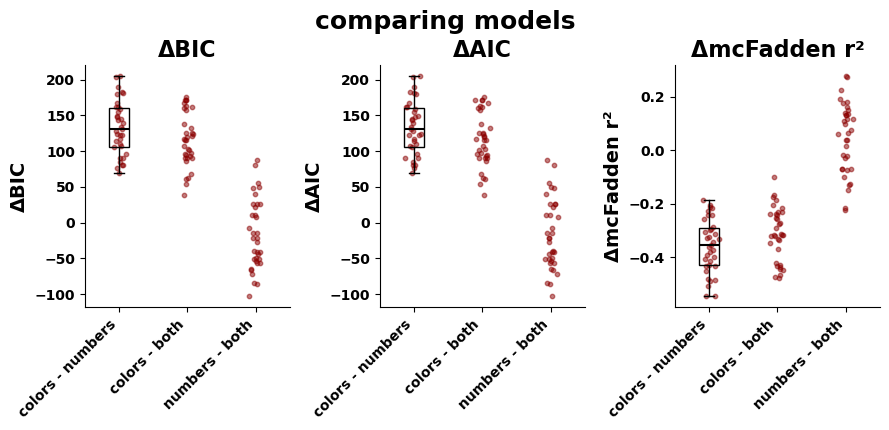

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(9, 5))

bic_deltas = [delta_bic_see_colors_see_numbers, delta_bic_see_colors_and_numbers_see_colors, delta_bic_see_colors_and_numbers_see_numbers]
aic_deltas = [delta_aic_see_colors_see_numbers, delta_aic_see_colors_and_numbers_see_colors, delta_aic_see_colors_and_numbers_see_numbers]
mcFadden_r2_deltas = [delta_mcFadden_r2_see_colors_see_numbers, delta_mcFadden_r2_see_colors_and_numbers_see_colors, delta_mcFadden_r2_see_colors_and_numbers_see_numbers]

bic_labels = ["colors - numbers", "colors - both", "numbers - both"]
mcFadden_labels = ["colors - numbers", "colors - both", "numbers - both"]

# Plot BIC deltas
box_bic = axs[0].boxplot(
    bic_deltas, vert=True, patch_artist=True, labels=bic_labels, 
    showmeans=False, 
    medianprops={'color': 'black', 'linewidth': 1.5}  
)

# Plot AIC deltas
box_aic = axs[1].boxplot(
    aic_deltas, vert=True, patch_artist=True, labels=bic_labels, 
    showmeans=False, 
    medianprops={'color': 'black', 'linewidth': 1.5}  
)

# Plot McFadden R2 deltas
box_mcFadden = axs[2].boxplot(
    mcFadden_r2_deltas, vert=True, patch_artist=True, labels=mcFadden_labels, 
    showmeans=False, 
    medianprops={'color': 'black', 'linewidth': 1.5}  
)

# Set box colors
for box in box_bic['boxes']:
    box.set(facecolor='none')
for box in box_aic['boxes']:
    box.set(facecolor='none')
for box in box_mcFadden['boxes']:
    box.set(facecolor='none')

scatter_colors = ['#8b0000', '#8b0000', '#8b0000']

# Add scatter points for BIC deltas
for i, delta in enumerate(bic_deltas):
    axs[0].scatter(np.random.normal(i + 1, 0.05, size=len(delta)), delta, alpha=0.5, s=10, color=scatter_colors[i])
axs[0].set_title("ΔBIC", fontsize=16, fontweight='bold')
axs[0].set_ylabel("ΔBIC", fontsize=14, fontweight='bold')

# Add scatter points for AIC deltas
for i, delta in enumerate(aic_deltas):
    axs[1].scatter(np.random.normal(i + 1, 0.05, size=len(delta)), delta, alpha=0.5, s=10, color=scatter_colors[i])
axs[1].set_title("ΔAIC", fontsize=16, fontweight='bold')
axs[1].set_ylabel("ΔAIC", fontsize=14, fontweight='bold')

# Add scatter points for McFadden R2 deltas
for i, delta in enumerate(mcFadden_r2_deltas):
    axs[2].scatter(np.random.normal(i + 1, 0.05, size=len(delta)), delta, alpha=0.5, s=10, color=scatter_colors[i])
axs[2].set_title("ΔmcFadden r²", fontsize=16, fontweight='bold')
axs[2].set_ylabel("ΔmcFadden r²", fontsize=14, fontweight='bold')

# Adjust axis properties
for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='y', labelsize=10)
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontweight('bold')

for ax in axs:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

fig.suptitle('comparing models', fontsize=18, fontweight='bold', y=0.85)

plt.tight_layout(rect=[0, 0, 1, 0.9]) 

filename = os.path.join(output_dir, "models_evaluation_comparison_bic_r2.pdf")
plt.savefig(filename, format='pdf')
print(f"Saved: {filename}")

plt.show()


# now best alpha and best beta:

In [6]:
best_alphas_s_see_colors = df_see_colors["best_alpha_s"]
best_alphas_s_see_numbers = df_see_numbers["best_alpha_s"]
best_alphas_s_sees_colors_and_numbers = df_see_colors_and_numbers["best_alpha_s"]


best_alphas_r_see_colors = df_see_colors["best_alpha_r"]
best_alphas_r_see_numbers = df_see_numbers["best_alpha_r"]
best_alphas_r_sees_colors_and_numbers = df_see_colors_and_numbers["best_alpha_r"]

best_etas_see_colors = df_see_colors["best_eta"]
best_etas_see_numbers = df_see_numbers["best_eta"]
best_etas_sees_colors_and_numbers = df_see_colors_and_numbers["best_eta"]

best_betas_see_colors = df_see_colors["best_beta"]
best_betas_see_numbers = df_see_numbers["best_beta"]
best_betas_sees_colors_and_numbers = df_see_colors_and_numbers["best_beta"]

# visualizations

Saved: 14_RL_agent_TDlearn_output_model_comparison_risk_dualQ\models_evaluation_comparison_best_alphas_eta_beta.pdf


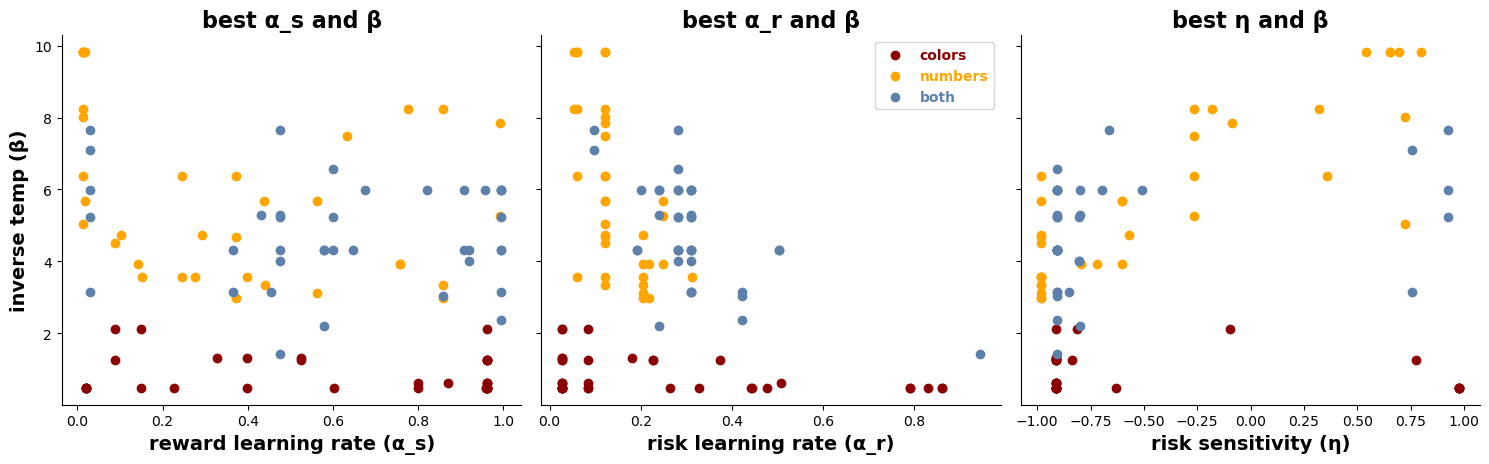

In [7]:
scatter_colors = ['#8b0000', 'orange', '#5e81ac']

alpha_s_values = [
    best_alphas_s_see_colors, 
    best_alphas_s_see_numbers, 
    best_alphas_s_sees_colors_and_numbers
]

alpha_r_values = [
    best_alphas_r_see_colors, 
    best_alphas_r_see_numbers, 
    best_alphas_r_sees_colors_and_numbers
]

eta_values = [
    best_etas_see_colors,
    best_etas_see_numbers,
    best_etas_sees_colors_and_numbers
]

beta_values = [
    best_betas_see_colors, 
    best_betas_see_numbers, 
    best_betas_sees_colors_and_numbers
]

labels = ['colors', 'numbers', 'both']

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# α s
for i in range(3):
    axes[0].scatter(alpha_s_values[i], beta_values[i], color=scatter_colors[i], label=labels[i])
    axes[0].set_xlabel("reward learning rate (α_s)", fontsize=14, fontweight='bold')
    axes[0].set_ylabel("inverse temp (β)", fontsize=14, fontweight='bold')
    axes[0].set_title("best α_s and β", fontsize=16, fontweight='bold')

# α r
for i in range(3):
    axes[1].scatter(alpha_r_values[i], beta_values[i], color=scatter_colors[i], label=labels[i])
    axes[1].set_xlabel("risk learning rate (α_r)", fontsize=14, fontweight='bold')
    axes[1].set_title("best α_r and β", fontsize=16, fontweight='bold')
    
    
# η
for i in range(3):
    axes[2].scatter(eta_values[i], beta_values[i], color=scatter_colors[i], label=labels[i])
    axes[2].set_xlabel("risk sensitivity (η)", fontsize=14, fontweight='bold')
    axes[2].set_title("best η and β", fontsize=16, fontweight='bold')


# Styling for all subplots
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='both', labelsize=10)
    
# Legend only once
legend = axes[1].legend()
for text, color in zip(legend.get_texts(), scatter_colors):
    text.set_color(color)
    text.set_fontweight('bold')

plt.tight_layout(rect=[0, 0, 1, 0.95])
filename = os.path.join(output_dir, "models_evaluation_comparison_best_alphas_eta_beta.pdf")
plt.savefig(filename, format='pdf')
print(f"Saved: {filename}")

plt.show()


In [8]:
# from scipy.stats import pearsonr

# # Calculate ratios for each condition
# ratios = [
#     (best_alphas_s_see_colors - best_alphas_r_see_colors) / (best_alphas_s_see_colors + best_alphas_r_see_colors),
#     (best_alphas_s_see_numbers - best_alphas_r_see_numbers) / (best_alphas_s_see_numbers + best_alphas_r_see_numbers),
#     (best_alphas_s_sees_colors_and_numbers - best_alphas_r_sees_colors_and_numbers) / (best_alphas_s_sees_colors_and_numbers + best_alphas_r_sees_colors_and_numbers)
# ]

# # Calculate correlations
# correlations = [
#     pearsonr(eta_values[0], ratios[0])[0],
#     pearsonr(eta_values[1], ratios[1])[0],
#     pearsonr(eta_values[2], ratios[2])[0]
# ]

# # Plotting
# fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# # Scatter plot for "color"
# axes[0].scatter(eta_values[0], ratios[0], alpha=0.7, color=scatter_colors[0])
# axes[0].set_title("color", fontsize=16, fontweight='bold')
# axes[0].set_xlabel("risk sensitivity (η)", fontsize=14, fontweight='bold')
# axes[0].set_ylabel("(α_s - α_r) / (α_s + α_r)", fontsize=14, fontweight='bold')
# axes[0].annotate(f"r = {correlations[0]:.2f}", xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, fontweight='bold', color=scatter_colors[0])

# # Scatter plot for "number"
# axes[1].scatter(eta_values[1], ratios[1], alpha=0.7, color=scatter_colors[1])
# axes[1].set_title("number", fontsize=16, fontweight='bold')
# axes[1].set_xlabel("risk sensitivity (η)", fontsize=14, fontweight='bold')
# axes[1].annotate(f"r = {correlations[1]:.2f}", xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, fontweight='bold', color=scatter_colors[1])

# # Scatter plot for "both"
# axes[2].scatter(eta_values[2], ratios[2], alpha=0.7, color=scatter_colors[2])
# axes[2].set_title("both", fontsize=16, fontweight='bold')
# axes[2].set_xlabel("risk sensitivity (η)", fontsize=14, fontweight='bold')
# axes[2].annotate(f"r = {correlations[2]:.2f}", xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, fontweight='bold', color=scatter_colors[2])

# # Styling for all subplots
# for ax in axes:
#     ax.spines['top'].set_visible(False)
#     ax.spines['right'].set_visible(False)
#     ax.tick_params(axis='both', labelsize=10)

# plt.tight_layout()
# plt.show()
